
# Identifikation von Studenten

**Analysen zur Unterscheidung von Studenten und Angehörigen des Hochschulpersonals**

**Zeitraum der aufgezeichneten Log-Einträge**
Mo, 12.10.2020 bis Do, 03.06.2021
Länge des Zeitraums: 7 Monate, 3 Wochen, 2 Tage
Länge in Tagen: 235 Tage
Länge in Wochen: 33 Wochen, 4 Tage

### Import von Bibliotheken und anderen Erweiterungen

In [138]:
from sqlalchemy import create_engine
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
from IPython.core.display_functions import display

### Definitionen zur Darstellung der Visualisierungen

In [139]:
sns.set_theme(style='white', font_scale=1.2, palette='Spectral')

### Import der Originaldaten im CSV-Format (optional)

In [140]:
# file = 'vfh_moodle_ws20.csv'
# moodle_data = pd.read_csv(file, delimiter=';')
# moodle_data

### Herstellung der Verbindung zur MySQL-Datenbank

In [141]:
user = "root"
password = "root"
host = "localhost"
database = "vfh_moodle_ws20"
port = 3306

engine = create_engine(f'mysql+pymysql://{user}:{password}@{host}/{database}', pool_recycle=port)
connection = engine.connect()

### Import der Arbeitsdaten aus der MySQL-Datenbank

In [142]:
query = """SELECT * FROM moodle_data"""
moodle_data = pd.read_sql(query, connection) # Definition der Arbeitsdaten

### Datenaufbereitung: Auswahl der Arbeitsdaten

In [143]:
# Konvertierung des Datentyps des Tabellenmerkmals timecreated
moodle_data['timecreated'] = pd.to_datetime(moodle_data['timecreated'], unit='s')

&nbsp;
**Begrenzung der Selektion auf Einzelbenutzer**

In [144]:
# Gegenstand der Untersuchungen sind nur Datensätze mit einer userid größer als 0. Damit werden jene Benutzer bei der Analyse nicht beachtet, die einer
# Beobachtung ihres Verhaltens nicht zugestimmt haben (userid = –2) oder die im Bachelor-Studiengang Medieninformatik Online studierten (userid = –3).
moodle_data = moodle_data[moodle_data.userid > 0]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
0,0,0,1,-2,sent,\core\event\notification_sent,notifications,3232247,2020-10-12 04:54:03,,0
1,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233121,2020-10-12 07:19:09,,0
2,0,0,3,0,loggedin,\core\event\user_loggedin,user,3463,2020-10-12 07:22:31,,0
3,0,0,2,-2,sent,\core\event\notification_sent,notifications,3233436,2020-10-12 07:48:03,,0
4,0,0,4,0,loggedin,\core\event\user_loggedin,user,6881,2020-10-12 07:55:19,,0
...,...,...,...,...,...,...,...,...,...,...,...
969025,0,0,26,26,viewed,\core\event\dashboard_viewed,,0,2021-06-03 10:00:41,,0
969026,1750,0,26,0,viewed,\core\event\course_viewed,,0,2021-06-03 10:00:45,,0
969027,1750,0,26,0,viewed,\mod_forum\event\course_module_viewed,forum,7082,2021-06-03 10:00:47,,0
969028,1750,0,26,0,viewed,\mod_forum\event\discussion_viewed,forum_discussions,334595,2021-06-03 10:00:49,,0


In [145]:
# Überprüfung der Benutzeranzahl
users = moodle_data.userid.nunique()
display(users)

142

&nbsp;
**Begrenzung der Selektion auf Benutzer in einem der offiziellen Studiengänge 1 bis 4**

In [146]:
# Gegenstand der Untersuchungen sind nur Datensätze mit einer Studiengangskennziffer größer als 0. Damit werden jene
# Benutzer bei der Analyse nicht beachtet, die nicht in einem der offiziellen Studiengänge 1 bis 4 aktiv waren.
moodle_data = moodle_data[moodle_data.Studiengang.astype(int) > 0]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
52,27739,4,4,0,viewed,\core\event\course_viewed,,0,2020-10-12 07:55:24,,0
53,27739,4,4,0,viewed,\core\event\course_viewed,,0,2020-10-12 07:55:27,,0
54,27739,4,4,0,updated,\core\event\course_module_updated,course_modules,919569,2020-10-12 07:56:11,label,76620
55,27739,4,4,0,viewed,\core\event\course_viewed,,0,2020-10-12 07:56:11,,0
56,27739,4,4,0,viewed,\core\event\course_viewed,,0,2020-10-12 07:57:07,,0
...,...,...,...,...,...,...,...,...,...,...,...
969003,28512,3,109,109,created,\mod_forum\event\discussion_subscription_created,forum_discussion_subs,45244,2021-06-03 21:11:23,,0
969004,28512,3,109,0,viewed,\mod_forum\event\course_module_viewed,forum,125767,2021-06-03 21:11:23,,0
969005,28512,3,109,109,deleted,\mod_forum\event\discussion_subscription_deleted,forum_discussion_subs,45244,2021-06-03 21:11:35,,0
969006,28512,3,109,0,viewed,\core\event\course_viewed,,0,2021-06-03 21:12:09,,0


In [147]:
# Überprüfung der Benutzeranzahl
users = moodle_data.userid.nunique()
display(users)

129

&nbsp;
**Begrenzung der Selektion auf Benutzer in Kursen der offiziellen Studiengänge 1 bis 4**

In [148]:
# Gegenstand der Untersuchungen sind nur Datensätze mit einer courseid größer oder gleich 27040. Damit werden nur jene
# Benutzer bei der Analyse beachtet, die auch in einem der Kurse des relevanten Untersuchungszeitraums aktiv waren.
moodle_data = moodle_data[moodle_data.courseid >= 27040]
moodle_data

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
52,27739,4,4,0,viewed,\core\event\course_viewed,,0,2020-10-12 07:55:24,,0
53,27739,4,4,0,viewed,\core\event\course_viewed,,0,2020-10-12 07:55:27,,0
54,27739,4,4,0,updated,\core\event\course_module_updated,course_modules,919569,2020-10-12 07:56:11,label,76620
55,27739,4,4,0,viewed,\core\event\course_viewed,,0,2020-10-12 07:56:11,,0
56,27739,4,4,0,viewed,\core\event\course_viewed,,0,2020-10-12 07:57:07,,0
...,...,...,...,...,...,...,...,...,...,...,...
969003,28512,3,109,109,created,\mod_forum\event\discussion_subscription_created,forum_discussion_subs,45244,2021-06-03 21:11:23,,0
969004,28512,3,109,0,viewed,\mod_forum\event\course_module_viewed,forum,125767,2021-06-03 21:11:23,,0
969005,28512,3,109,109,deleted,\mod_forum\event\discussion_subscription_deleted,forum_discussion_subs,45244,2021-06-03 21:11:35,,0
969006,28512,3,109,0,viewed,\core\event\course_viewed,,0,2021-06-03 21:12:09,,0


In [149]:
# Überprüfung der Benutzeranzahl
users = moodle_data.userid.nunique()
display(users)

123

### Datenaufbereitung: Erstellung eigener Datensets für Dozenten und Studenten

In [150]:
md = moodle_data # Umbenennung der Variable, um den Code zu verkürzen

In [151]:
records_teachers = [md[md.userid == 2],
                    md[md.userid == 4],
                    md[md.userid == 6],
                    md[md.userid == 9],
                    md[md.userid == 10],
                    md[md.userid == 11],
                    md[md.userid == 27],
                    md[md.userid == 28],
                    md[md.userid == 29],
                    md[md.userid == 32]]
md_teachers = pd.concat(records_teachers)
md_teachers

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
8968,27583,4,2,0,uploaded,\mod_forum\event\assessable_uploaded,forum_posts,763049,2020-10-12 06:48:33,,0
8969,27583,4,2,0,created,\mod_forum\event\post_created,forum_posts,763049,2020-10-12 06:48:33,,0
8970,27583,4,2,0,viewed,\mod_forum\event\discussion_viewed,forum_discussions,318577,2020-10-12 06:48:33,,0
8975,27583,4,2,0,viewed,\core\event\course_viewed,,0,2020-10-12 07:01:23,,0
8976,27583,4,2,0,viewed,\mod_forum\event\course_module_viewed,forum,120546,2020-10-12 07:01:26,,0
...,...,...,...,...,...,...,...,...,...,...,...
967383,28223,4,32,0,viewed,\mod_url\event\course_module_viewed,url,232847,2021-06-03 11:45:03,,0
967387,28223,4,32,0,viewed,\core\event\course_viewed,,0,2021-06-03 11:47:34,,0
967388,28223,4,32,0,viewed,\core\event\course_viewed,,0,2021-06-03 11:47:36,,0
967389,28223,4,32,0,updated,\core\event\course_module_updated,course_modules,942936,2021-06-03 11:47:51,url,232847


In [152]:
records_students = [md[md.userid == 1],
                    md[md.userid == 13],
                    md[md.userid == 18],
                    md[md.userid == 19],
                    md[md.userid == 20],
                    md[md.userid == 22],
                    md[md.userid == 23],
                    md[md.userid == 24],
                    md[md.userid == 25],
                    md[md.userid == 38]]
md_students = pd.concat(records_students)
md_students

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
25864,27583,4,1,-2,viewed,\core\event\user_profile_viewed,user,39709,2020-11-16 16:59:01,,0
26190,27583,4,1,0,viewed,\core\event\course_viewed,,0,2020-10-12 03:55:03,,0
26191,27583,4,1,0,viewed,\mod_forum\event\course_module_viewed,forum,120548,2020-10-12 03:55:06,,0
26192,27583,4,1,0,viewed,\mod_forum\event\discussion_viewed,forum_discussions,318592,2020-10-12 03:55:19,,0
26193,27583,4,1,0,viewed,\mod_forum\event\discussion_viewed,forum_discussions,318577,2020-10-12 04:03:42,,0
...,...,...,...,...,...,...,...,...,...,...,...
958888,28236,1,38,0,viewed,\core\event\course_viewed,,0,2021-06-01 20:47:38,,0
958889,28236,1,38,0,viewed,\mod_scheduler\event\booking_form_viewed,scheduler,101,2021-06-01 20:47:47,,0
967269,28482,1,38,0,viewed,\core\event\course_viewed,,0,2021-06-03 10:24:49,,0
967310,28482,1,38,0,viewed,\core\event\course_viewed,,0,2021-06-03 11:05:12,,0


### Datenanalyse: Untersuchung der Aktivitäten von Dozenten und Studenten

In [153]:
# Ermittlung der Menge der Log-Einträge pro Action für Dozenten
teachers_actions = md_teachers.action.groupby(md.action).count()
display(teachers_actions)

action
abandoned         2
accepted          3
added           403
created        2248
deleted         303
downloaded      170
ended             6
evaluated       348
exported          4
graded         2304
granted          15
joined           26
left             20
moved             2
regraded          3
removed          32
restored          2
reviewed         93
searched         12
started          66
submitted         3
switched         16
updated        5106
uploaded        743
viewed        26185
Name: action, dtype: int64

In [154]:
# Ermittlung der Menge der Log-Einträge pro Action für Studenten
students_actions = md_students.action.groupby(md.action).count()
display(students_actions)

action
accepted         28
added            21
created         392
deleted          46
downloaded        2
duplicated        1
ended             4
graded          106
joined          127
left             15
removed           2
reviewed         94
searched          4
started         214
submitted       443
updated          88
uploaded        344
viewed        22718
Name: action, dtype: int64

&nbsp;
**Erstellung eines kombinierten Datensets für Dozenten und Studenten**

In [155]:
# Erstellung eines kombinierten Datensets für Dozenten und Studenten
users_actions = pd.concat([teachers_actions, students_actions], axis=1, keys=['teachers', 'students']).sort_index()

# Ersetzung von NaN-Werten durch den Wert 0
users_actions = users_actions.fillna(0)

# Ausgabe des kombinierten Datensets
display(users_actions)

,teachers,students
action,,
abandoned,2.0,0.0
accepted,3.0,28.0
added,403.0,21.0
created,2248.0,392.0
deleted,303.0,46.0
downloaded,170.0,2.0
duplicated,0.0,1.0
ended,6.0,4.0
evaluated,348.0,0.0


&nbsp;
**Visualisierung des kombinierten Datensets für Dozenten und Studenten**

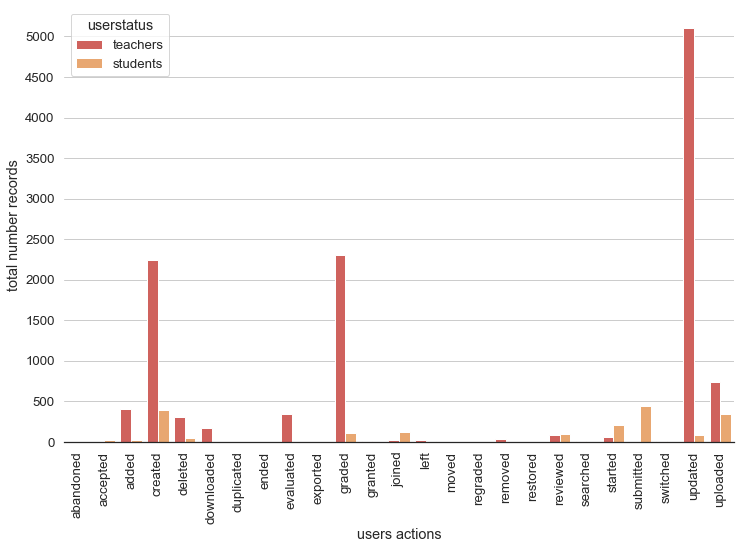

In [156]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(12, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Entfernung der letzten Zeile betreffend die action viewed,
# um Differenzen anderer Werte besser visualisieren zu können.
users_actions = users_actions[:-1]

# Visualisierung der Menge der Log-Einträge pro Action für Dozenten und Studenten
result = users_actions.stack().reset_index().set_index('action').rename(columns={'level_1': 'teachers', 0: 'students'})
chart = sns.barplot(x=result.index, y='students', data=result, hue='teachers')

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('users actions')
chart.set_ylabel('total number records')
chart.yaxis.set_ticks(range(0, 5500, 500))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='upper left', title='userstatus')
# plt.savefig('charts/Menge_der_Log-Eintraege_pro_Aktivitaet_und_Benutzergruppe.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Action nur für Dozenten**

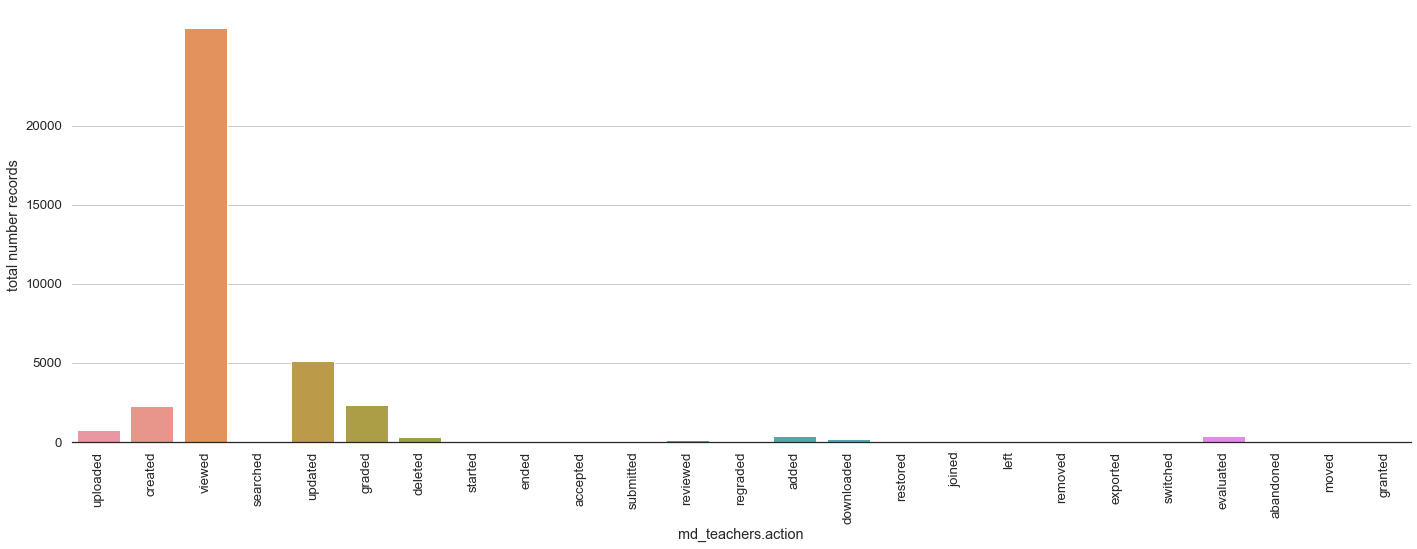

In [157]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Action nur für Dozenten
chart = sns.countplot(x=md_teachers.action)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('md_teachers.action')
chart.set_ylabel('total number records')
chart.yaxis.set_ticks(range(0, 25000, 5000))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Action nur für Studenten**

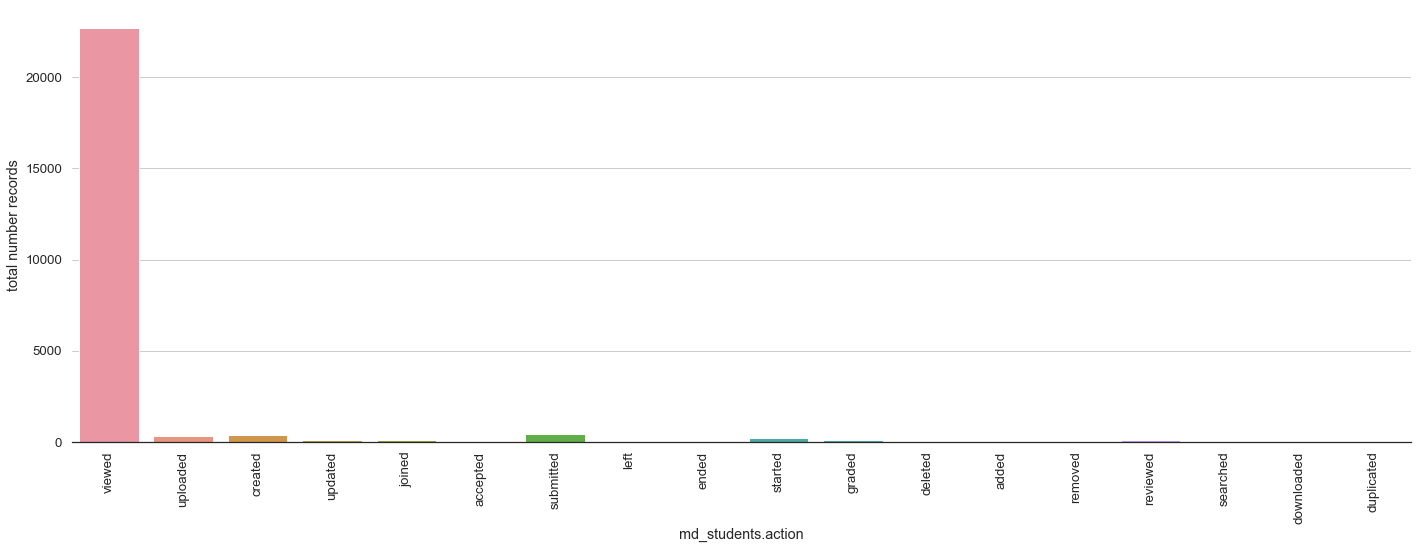

In [158]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8)) # Größe der Visualisierung (in inch)
plt.xticks(rotation=90) # Drehung der Achsenbeschriftung

# Visualisierung der Menge der Log-Einträge pro Action nur für Studenten
chart = sns.countplot(x=md_students.action)
# chart = sns.countplot(x=moodle_data_students.action, hue=moodle_data_students.userid)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('md_students.action')
chart.set_ylabel('total number records')
chart.yaxis.set_ticks(range(0, 25000, 5000))
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Dozenten und der von ihnen ausgeführten Aktivitäten**

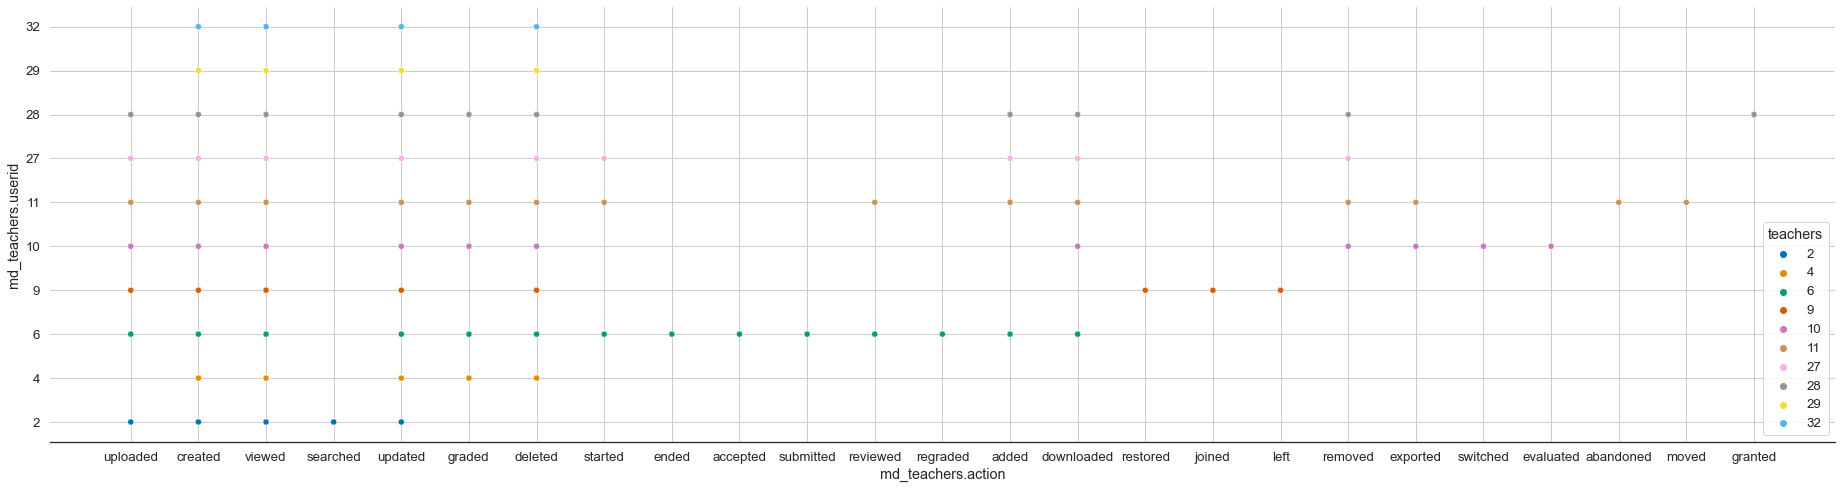

In [159]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Dozenten und der von ihnen ausgeführten Aktivitäten
chart = sns.scatterplot(x=md_teachers.action, y=md_teachers.userid.astype(str), hue=md_teachers.userid, palette='colorblind')

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('md_teachers.action')
chart.set_ylabel('md_teachers.userid')
chart.invert_yaxis()
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='lower right', title='teachers')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Studenten und der von ihnen ausgeführten Aktivitäten**

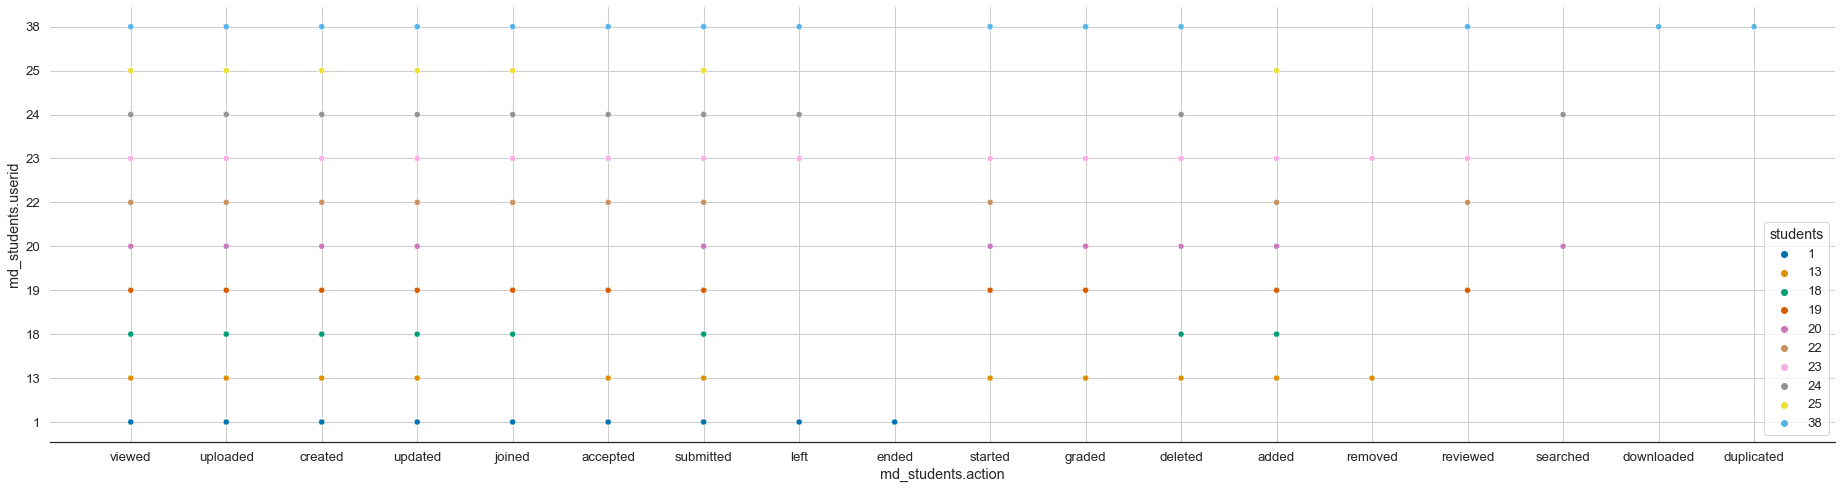

In [160]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(32, 8)) # Größe der Visualisierung (in inch)

# Visualisierung der Studenten und der von ihnen ausgeführten Aktivitäten
chart = sns.scatterplot(x=md_students.action, y=md_students.userid.astype(str), hue=md_students.userid, palette='colorblind')

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='both')
chart.set_axisbelow(True)
chart.set_xlabel('md_students.action')
chart.set_ylabel('md_students.userid')
chart.invert_yaxis()
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='lower right', title='students')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Erstellung eines Datensets nur für Aktivitäten von Dozenten**

In [161]:
specified_teachers_actions = [md_teachers[md_teachers.action == 'added'],
                              md_teachers[md_teachers.action == 'created'],
                              md_teachers[md_teachers.action == 'deleted'],
                              md_teachers[md_teachers.action == 'evaluated'],
                              md_teachers[md_teachers.action == 'graded'],
                              md_teachers[md_teachers.action == 'updated'],
                              md_teachers[md_teachers.action == 'submitted']]  # List of your dataframes
specified_teachers_actions = pd.concat(specified_teachers_actions)
specified_teachers_actions

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
413468,27747,4,6,-2,added,\core\event\group_member_added,groups,24890,2021-01-17 11:44:00,,0
413528,27747,4,6,-2,added,\core\event\group_member_added,groups,24891,2021-01-17 18:32:19,,0
413530,27747,4,6,-2,added,\core\event\group_member_added,groups,24892,2021-01-17 18:32:19,,0
413532,27747,4,6,-2,added,\core\event\group_member_added,groups,24893,2021-01-17 18:32:19,,0
413534,27747,4,6,-2,added,\core\event\group_member_added,groups,24894,2021-01-17 18:32:19,,0
...,...,...,...,...,...,...,...,...,...,...,...
966648,28223,4,32,0,updated,\core\event\course_module_updated,course_modules,942936,2021-06-03 11:47:51,url,232847
967389,28223,4,32,0,updated,\core\event\course_module_updated,course_modules,942936,2021-06-03 11:47:51,url,232847
397836,27747,4,6,0,submitted,\mod_assign\event\assessable_submitted,assign_submission,548374,2021-01-14 21:34:57,,0
398299,27747,4,6,0,submitted,\mod_assign\event\assessable_submitted,assign_submission,548374,2021-01-14 21:34:57,,0


&nbsp;
**Erstellung eines Datensets nur für Aktivitäten von Studenten**

In [162]:
specified_students_actions = [md_students[md_students.action == 'added'],
                              md_students[md_students.action == 'created'],
                              md_students[md_students.action == 'deleted'],
                              md_students[md_students.action == 'evaluated'],
                              md_students[md_students.action == 'graded'],
                              md_students[md_students.action == 'updated'],
                              md_students[md_students.action == 'submitted']]  # List of your dataframes
specified_students_actions = pd.concat(specified_students_actions)
specified_students_actions

,courseid,Studiengang,userid,relateduserid,action,eventname,objecttable,objectid,timecreated,course_module_type,instanceid
393403,27419,1,13,35,added,\mod_scheduler\event\booking_added,scheduler_slots,1708,2021-01-13 13:57:57,,0
393417,27419,1,13,35,added,\mod_scheduler\event\booking_added,scheduler_slots,1707,2021-01-13 13:58:18,,0
680059,28259,2,18,18,added,\core\event\group_member_added,groups,26118,2021-03-24 10:09:19,,0
826930,28264,2,18,141,added,\mod_scheduler\event\booking_added,scheduler_slots,2163,2021-05-06 17:29:10,,0
393524,27419,1,19,35,added,\mod_scheduler\event\booking_added,scheduler_slots,1707,2021-01-13 14:16:44,,0
...,...,...,...,...,...,...,...,...,...,...,...
844133,28482,1,38,0,submitted,\mod_assign\event\assessable_submitted,assign_submission,567822,2021-05-11 10:42:42,,0
894145,28482,1,38,0,submitted,\mod_assign\event\assessable_submitted,assign_submission,576741,2021-05-20 07:59:54,,0
897275,28482,1,38,0,submitted,\mod_assign\event\assessable_submitted,assign_submission,576210,2021-05-21 06:38:01,,0
897298,28482,1,38,0,submitted,\mod_assign\event\assessable_submitted,assign_submission,576210,2021-05-21 06:39:41,,0


&nbsp;
**Visualisierung der Menge der Log-Einträge pro Action für Dozenten, gruppiert nach Aktivitäten**

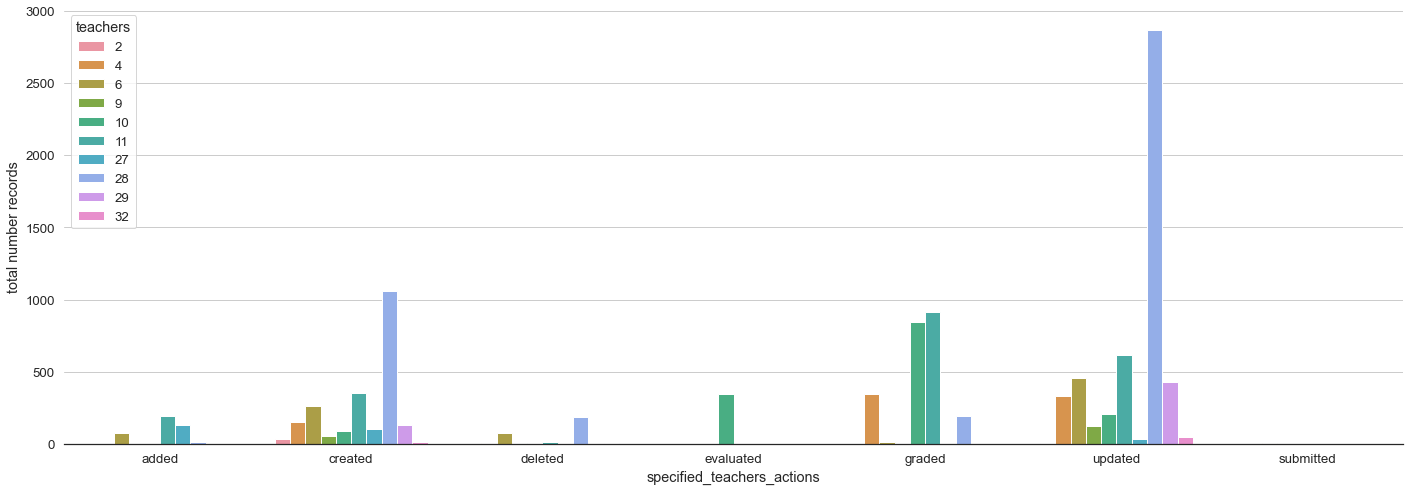

In [163]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Action für Dozenten, gruppiert nach Aktivitäten
chart = sns.countplot(x=specified_teachers_actions['action'], hue=specified_teachers_actions.userid)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('specified_teachers_actions')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='upper left', title='teachers')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()

&nbsp;
**Visualisierung der Menge der Log-Einträge pro Action für Studenten, gruppiert nach Aktivitäten**

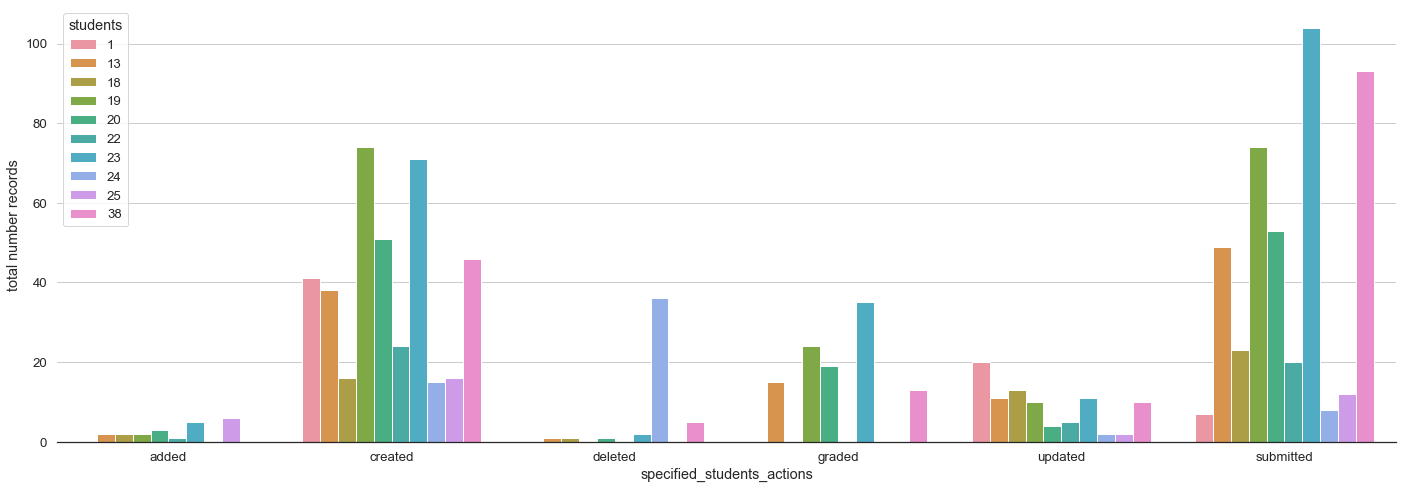

In [164]:
# Spezifische Definitionen zur Darstellung der Visualisierung
plt.figure(figsize=(24, 8))  # Größe der Visualisierung (in inch)

# Visualisierung der Menge der Log-Einträge pro Objecttable
chart = sns.countplot(x=specified_students_actions['action'], hue=specified_students_actions.userid)

# weitere Anweisungen zur Darstellung der Visualisierung
chart.grid(axis='y')
chart.set_axisbelow(True)
chart.set_xlabel('specified_students_actions')
chart.set_ylabel('total number records')
chart.tick_params(left=False, bottom=False)
sns.despine(left=True)
plt.legend(loc='upper left', title='students')
# plt.savefig('charts/###.pdf', format='pdf')
plt.show()